# Time eofs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import norm
import sys
import os

sys.path.append(os.path.abspath("/home/hana/Documents/dalhousie/training/CREATE/Data_Module/codes/eof-analysis"))
from eofs import eofs

In [3]:
# ==============================
# Basic EOF that captures temporal distribution of spatial variance
# ==============================

# Load data
mat = loadmat("../bbm_tidecrittry.mat")
data = mat["B2s"]  # adjust key if needed

num_modes = 170
M, N = data.shape

# Remove mean (along space dimension, MATLAB dim=1)
data_noav = data.T - data.T.mean(axis=1, keepdims=True)

# Coordinates (bbm_tidecrittry case)
myx = np.arange(0.5, 2047.5 + 1) / 4096
mytime = np.arange(0, 600)

# coeff - Time coefficients
# lambda_vals - Eigenvalues (unnormalized, descending order)
# u - Spatial EOFs (eigenvectors as columns)
# cumul_approx - Cumulative approximations using 1..k modes
lambda_vals, u, coeff, cumul_approx = eofs(data_noav, num_modes)

In [4]:
data.shape, data_noav.shape

((2048, 600), (600, 2048))

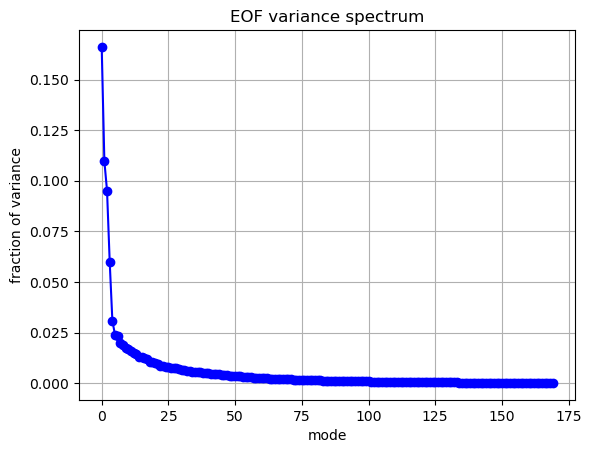

In [5]:
# ==============================
# Figure 1: Eigenvalue spectrum
# ==============================

plt.figure(1)
plt.clf()
plt.plot(lambda_vals / lambda_vals.sum(), "bo-")
plt.xlabel("mode")
plt.ylabel("fraction of variance")
plt.title("EOF variance spectrum")
plt.grid(True)

This distribution is slightly different from that for the spatial distribution of the temporal variance. The first mode accounts for more of the variance here. The second mode accounts for a similar amount of variance here as for the spatial distribution of temporal variance.

In [7]:
#### ==============================
# Error analysis
# ==============================

myerr2 = np.zeros(num_modes)
myerrinf = np.zeros(num_modes)

for ii in range(num_modes):
    myapp = cumul_approx[ii]
    myerrnow = (myapp - data_noav).T
    myerr2[ii] = norm(myerrnow, 2)
    myerrinf[ii] = norm(myerrnow, np.inf)

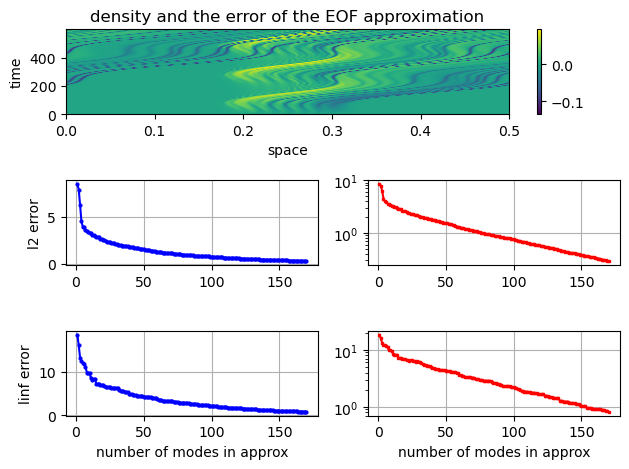

In [8]:
# ==============================
# Figure 2: Data and errors
# ==============================

plt.figure(2)
plt.clf()

plt.subplot(3, 1, 1)
plt.pcolormesh(myx, mytime, data.T, shading="auto")
plt.xlabel('space')
plt.ylabel('time')
plt.colorbar()
plt.title("density and the error of the EOF approximation")

plt.subplot(3, 2, 3)
plt.plot(np.arange(1, num_modes + 1), myerr2, "bo-", markersize=2)
plt.grid(True)
plt.ylabel("l2 error")

plt.subplot(3, 2, 4)
plt.semilogy(np.arange(1, num_modes + 1), myerr2, "rs-", markersize=2)
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(np.arange(1, num_modes + 1), myerrinf, "bo-", markersize=2)
plt.grid(True)
plt.ylabel("linf error")
plt.xlabel("number of modes in approx")

plt.subplot(3, 2, 6)
plt.semilogy(np.arange(1, num_modes + 1), myerrinf, "rs-", markersize=2)
plt.grid(True)
plt.xlabel("number of modes in approx")

plt.tight_layout()

Here we see the norm-2 error drops off steeply along the first 4 modes in the approximation. The infinity-norm error drops off less quickly.

Text(0.5, 0, 'time')

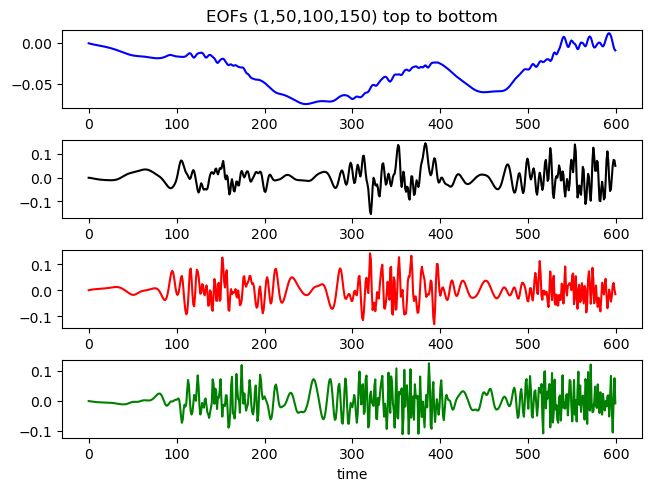

In [10]:
# ==============================
# Figure 3: Spatial EOFs
# ==============================

plt.figure(3, layout='constrained')
plt.clf()

plt.subplot(4, 1, 1)
plt.plot(mytime, u[:, 0], "b-")
plt.title("EOFs (1,50,100,150) top to bottom")

plt.subplot(4, 1, 2)
plt.plot(mytime, u[:, 49], "k-")

plt.subplot(4, 1, 3)
plt.plot(mytime, u[:, 99], "r-")

plt.subplot(4, 1, 4)
plt.plot(mytime, u[:, 149], "g-")
plt.xlabel("time")

The first EOF captures the slowest variance over space with time. Increasing modes capture finer spatial variance. The values of the first EOF are mostly negative, while subsequent EOFs appear centered at zero.